In [13]:
# MATH 535 Homework 2
# Corbin Graham

import numpy as np
import matplotlib.pyplot as plt
from skimage import io, color, transform, util
from threading import Thread
import time

# Part 1
---

### Data Aquisition
I measured all of the p-curves and maximum values using MATLAB code I've attached in a zip folder titles 'Part 1.zip'; I had to use MATLAB for the p-curves because python's runtime was far too long (nearing 10 minutes per image) and the resulting values differed slightly from those using the provided chi-squared test.

### Questions
I am unsure that my FPR,TPR are plotting correctly but all measurements were done solely based on the equaitons provided in lecture material.

### Difficulties
There were many parts of this assignment that were incredibly challening and the greatest being the compute time of the p-curves.  I tried for too long on Python before giving up and moving to MATLAB to compute them.

Then, I was unsure that my ROC curves were correct since they did not seem to follow the specific shape as examples in lecture.

In [142]:
def roc(cover, stego, title):
  fp = 0; tn = 0
  fn = 0; tp = 0
  final_x = []
  final_y = []
  rates = []
  for r in range(1, 101):
    r = r / 100
    rates.append(r)
    for i in cover:
      # print(i)
      if i > r:
        fp += 1
      else: tn += 1
    for i in stego:
      if i > r:
        tp += 1
      else: fn += 1
    FPR = fp / (fp + tn)
    TPR = tp / (tp + fn)
    final_x.append(FPR)
    final_y.append(TPR)
    fp = 0; tn = 0
    fn = 0; tp = 0
    # print(r, FPR)
  plt.plot(final_x, final_y, label='FPR / TPR')
  # plt.plot(range(1, 101) / 100, rates, label='R')
  plt.xlabel('False Positive Rate')
  plt.ylabel('True Positive Rate')
  plt.title(title)
  # plt.legend()
  plt.show()

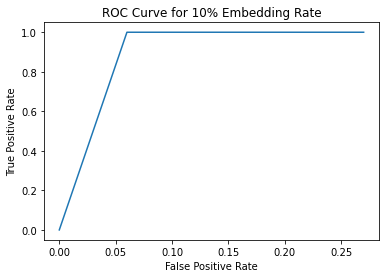

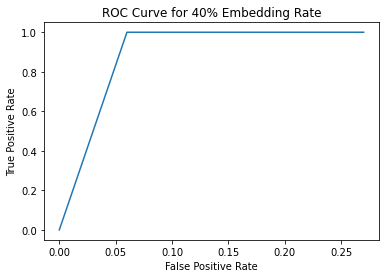

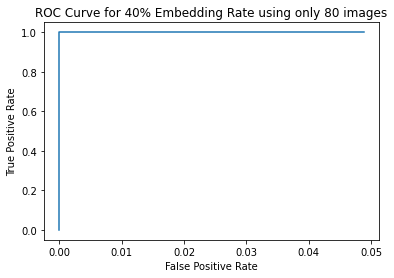

In [143]:
"""
  Print Statements for the code above
"""

# The p-graphs for these two images: 123739.PNG (a cover image); and the stego image corresponding to that cover image that has 40% embedding in it.
# **See part1.m**

# For the following parts, I computed the maximum p-value for all of the p-value curves in MATLAB due to the significant runtime of python for the same calculation
#   and to fix the inconsistencies that python had with the values. Along with that, if I waited for the results, sometimes Google Colab would kill the runtime before
#   I could get the results and it ended up with me losing my data multiple times. Thus, to avoid that, I imported all of the values I had calculated using matlab
#   to python for the ROC curves.
# Run pvals.m on the cover and stego images to see the results I will be using for the ROC curves.
max_p_cover = [
    0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0006, 0.0013, 0.0000, 0.3737, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0117, 0.0000, 0.0000, 0.0015,
    0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.5818, 0.0000,
    0.0000, 0.0000, 0.9931, 0.0000, 0.0000, 0.9946, 0.0063, 0.0000, 0.0000, 0.2523, 0.0015, 0.9979, 0.0738, 0.0283, 0.2064, 0.2303, 0.9991, 0.0522, 0.9938, 0.1310, 0.0000, 0.0000, 0.0000, 0.9696, 0.0000, 0.8128,
    0.0000, 0.9501, 0.0000, 0.9934, 0.0000, 0.0000, 0.0000, 0.9515, 0.1245, 0.2530, 0.0002, 0.3064, 0.0000, 0.0055, 0.5365, 0.0000, 0.0000, 0.0000, 0.9397, 0.9603, 0.0432, 0.0000
]
max_p_stego_01 = [
    1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
    1.0000, 1.0000, 1.0000, 1.0000, 0.9993, 0.9981, 1.0000, 1.0000, 1.0000, 1.0000, 0.9997, 1.0000, 1.0000, 0.9985, 1.0000, 1.0000, 0.9995, 0.9974, 1.0000, 0.9999, 0.9997, 1.0000, 0.9992, 1.0000, 0.9991, 0.9983,
    0.9984, 1.0000, 0.9988, 0.9999, 0.9981, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 0.9995, 0.9998, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 0.9989, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
    1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 0.9999, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 0.9995, 0.9995, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 0.9997, 1.0000
]
max_p_stego_04 = [
    1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
    1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
    1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 0.9978, 1.0000, 1.0000, 1.0000, 1.0000, 0.9990, 1.0000, 1.0000, 0.9999, 1.0000, 0.9999, 1.0000, 1.0000, 1.0000,  0.9998, 1.0000, 1.0000, 1.0000, 1.0000,
    0.9990, 1.0000, 0.9991, 1.0000, 1.0000, 1.0000, 0.9997, 1.0000, 0.9998, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 0.9999, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000
]

# The ROC curve for 10% using all 100 images.
roc(max_p_cover, max_p_stego_01, 'ROC Curve for 10% Embedding Rate')

# The ROC curve for 40% using all 100 images.
roc(max_p_cover, max_p_stego_04, 'ROC Curve for 40% Embedding Rate')


# The ROC curve for 40% but using only 80 of the images.
roc(max_p_cover[:41], max_p_stego_04[:41], 'ROC Curve for 40% Embedding Rate using only 80 images')

# roc(max_p_cover, max_p_cover, 'Baseline Test')



## Part 1: Analysis
---

3. What value for the threshold should you choose if you want to get a rate of 5% false positives for the 10% embedding? For the 40% embedding? Is 5% false positive rate a reasonable error to choose for this data? Why or why not? 

* The R value for a 5% FPR on 10% embedding would be anything above 0.99.
* The R value for a 5% FPR on 40% embedding would be anything above 0.99.
* After running a sample case comparing the FPR of a non-embedded image against that of the embedded images, it is not justifiable that it is embedded just because it has a 5% FPR.  The true positive rate doesn't change significantly until above a 6% FPR.

4. Plot a third ROC curve where you use only the first 40 covers and 40 stegos as your data (40% embedding). Then pick a threshold value that gives a 5% false positive rate for these 80 images. Is it the same threshold value as in (c) for the 40% embedding with all 100 images? Apply that threshold to the remaining 20 images (10 cover, 10 stego). What errors do you get, FP and FN, on this set of 20 test images? Discuss your findings. 

* The false dramatically decreases with less images.  The 5% false positive rate would be valid to use for such a small group of images.  The TPR also jumped to a much more significant value far sooner than in cases with greater quantities of images.  It is almost an inverse threshold; I began to see the FPR of 5% immediately with the R-value of 1%.  The error rate dramatically increased and it could flag non-embedded images.

5. Do any of these datasets allow you to pick a threshold where you can get no errors? Why or why not?

* I believe that at any rate, the image would appear to have some error and the rate of error follows a p-norm curve.  Thus, changing the image 100% would result in less error than 50%.

# Part 2
---

1. 30 flat-field image files that you will upload to our class folder
  * Uploaded images as GrahamFlatField(n).jpg
2. 50 regular-scene images that you will upload to our class folder
  * Uploaded images as GrahamNormal(n).jpg
3. A short description in your homework pdf of how you obtained the flat-field images. 
  * Images were obtained using my smartphone over the course of my day on campus and at my apartment. Having come up short on the 50 regular-scene photos,
  I decided to use some photos I had previously taken on trips to Wisconsin and Colorado.
4. A record of the model and type of camera used for your experiment.
  * iPhone 12 Pro: 12MP Wide Camera, 26mm, f1.6, 4032x3024
5. Any data acquisition challenges you encountered.
  * I had taken many photos on campus throughout my day but realized that a majority of the images contained some reference to either ISU or student organization, or student.  I had to disclude those images and came up just short of the 50-image requirement so I then had to find photos I had taken previously in the same orientation with the same camera.